In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
df = pd.read_csv("Amazon Sale Report.csv", encoding='latin1')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [69]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [70]:
df.drop_duplicates(inplace=True)

In [71]:
df = df.dropna(subset=['Amount'])
df.fillna(method='ffill', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7484\3794168508.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [72]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

C:\Users\Dell\AppData\Local\Temp\ipykernel_7484\2019407450.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [73]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

In [74]:
df['Revenue'] = df['Amount'] * df['Qty']

In [75]:
total_sales = df['Amount'].sum()
total_orders = df['Order ID'].nunique()
total_qty = df['Qty'].sum()
print("Total Sales:", total_sales)
print("Total Orders:", total_orders)
print("Total Quantity Sold:", total_qty)

Total Sales: 78496786.39
Total Orders: 112887
Total Quantity Sold: 116329


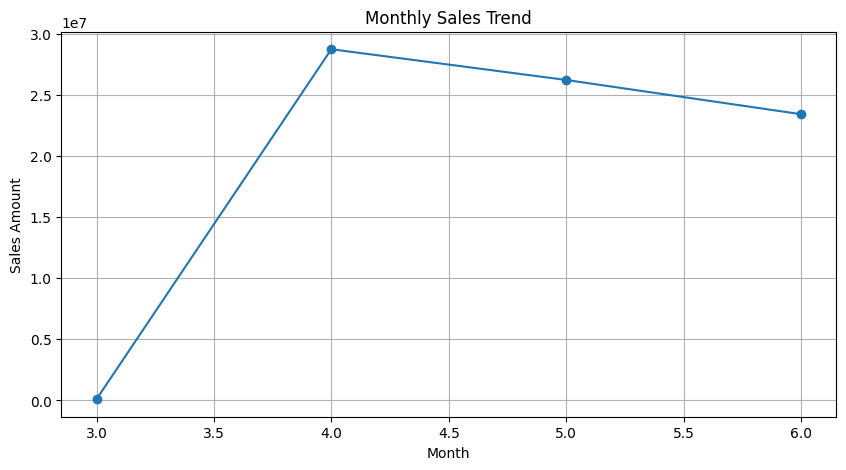

In [76]:
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()

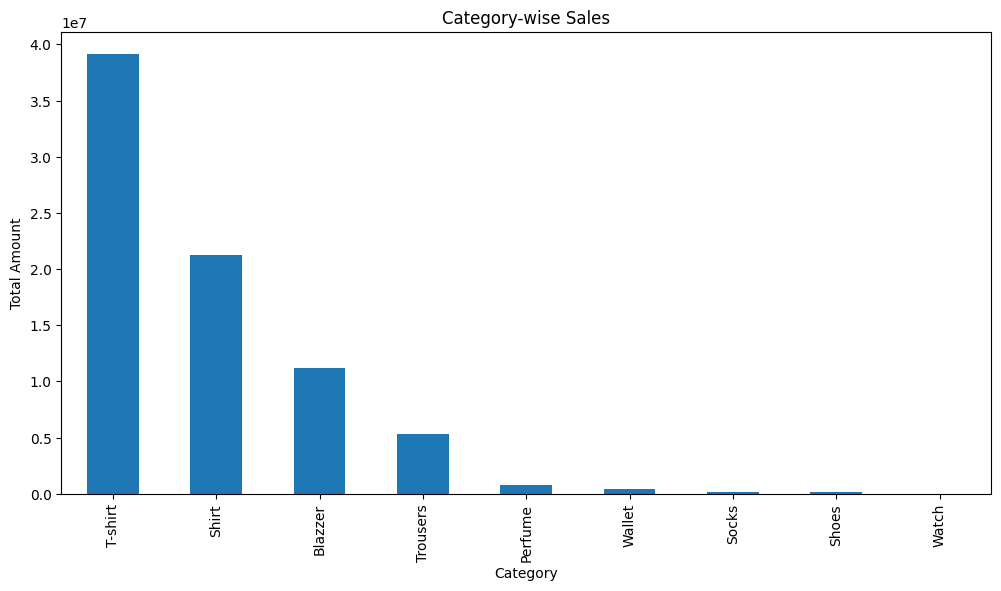

In [77]:
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
category_sales.plot(kind='bar')
plt.title("Category-wise Sales")
plt.ylabel("Total Amount")
plt.xlabel("Category")
plt.show()

In [78]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'Month',
       'Year', 'Revenue'],
      dtype='object')

In [79]:
df['Revenue'].sum()

np.float64(75941866.0)

In [80]:
df['Qty'].sum()

np.int64(116329)

In [81]:
df['Order ID'].nunique()

112887

In [82]:
df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

Category
T-shirt     37885025.0
Shirt       20647301.0
Blazzer     10701134.0
Trousers     5236444.0
Perfume       761151.0
Wallet        441259.0
Socks         142870.0
Shoes         125767.0
Watch            915.0
Name: Revenue, dtype: float64

In [83]:
df.groupby('Category')['Qty'].sum().sort_values(ascending=False)

Category
T-shirt     45164
Shirt       44903
Blazzer     13930
Trousers     9885
Perfume      1051
Wallet        844
Socks         397
Shoes         152
Watch           3
Name: Qty, dtype: int64

In [84]:
df.groupby('Month')['Revenue'].sum()

Month
3       98261.0
4    27754705.0
5    25326683.0
6    22762217.0
Name: Revenue, dtype: float64

In [85]:
df.groupby('Month')['Order ID'].count()

Month
3      162
4    45907
5    39536
6    35414
Name: Order ID, dtype: int64

In [86]:
df.groupby('ship-state')['Revenue'].sum().sort_values(ascending=False)

ship-state
MAHARASHTRA      12924904.0
KARNATAKA        10210286.0
TELANGANA         6701292.0
UTTAR PRADESH     6555474.0
TAMIL NADU        6327723.0
                    ...    
rajsthan              521.0
AR                    493.0
Rajsthan              443.0
PB                    399.0
Meghalaya               0.0
Name: Revenue, Length: 68, dtype: float64

In [87]:
df.groupby('ship-city')['Revenue'].sum().sort_values(ascending=False)

ship-city
BENGALURU                     6699373.0
HYDERABAD                     4796100.0
MUMBAI                        3586597.0
NEW DELHI                     3491297.0
CHENNAI                       2997055.0
                                ...    
ramgarh                             0.0
AWALPUR, dist Chandrapur            0.0
Palakonda/srikakulam(dist)          0.0
trichy                              0.0
trichirapalli                       0.0
Name: Revenue, Length: 8697, dtype: float64

In [88]:
df['Courier Status'].value_counts()

Courier Status
Shipped       109341
Unshipped       6551
On the Way      5127
Name: count, dtype: int64

In [89]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      83542
Merchant    37477
Name: count, dtype: int64

In [90]:
df.groupby('Sales Channel')['Revenue'].sum()

Sales Channel
Amazon.in    75941866.0
Name: Revenue, dtype: float64

In [91]:
df['PendingS'].sum()

np.float64(0.0)

In [92]:
df['New'].sum()

np.float64(0.0)

In [93]:
df.nlargest(10, 'Revenue')

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Month,Year,Revenue
42040,42039,402-5239558-4281957,2022-04-05,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,ANDHRA PRADESH,522007.0,IN,False,Easy Ship,NaN,NaN,4,2022,44672.0
11161,11160,403-4106553-1691525,2022-04-23,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,3XL,Shipped,...,PUNJAB,144022.0,IN,True,Easy Ship,NaN,NaN,4,2022,27475.0
89151,89150,406-7195963-2374765,2022-05-02,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,UTTAR PRADESH,226002.0,IN,False,Easy Ship,NaN,NaN,5,2022,12144.0
39945,39944,408-3363121-6123562,2022-04-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XS,Shipped,...,UTTAR PRADESH,208001.0,IN,False,Easy Ship,NaN,NaN,4,2022,11440.0
79900,79899,405-6877720-7865168,2022-05-07,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Shirt,M,Shipped,...,HARYANA,123029.0,IN,False,Easy Ship,NaN,NaN,5,2022,11184.0
113351,113350,403-4040971-3884354,2022-06-11,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,...,UTTAR PRADESH,202001.0,IN,False,Easy Ship,NaN,NaN,6,2022,10875.0
121020,121019,403-0343365-3075550,2022-06-06,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XXL,Shipped,...,TELANGANA,500009.0,IN,False,Easy Ship,NaN,NaN,6,2022,10656.0
33334,33333,405-4755854-9568304,2022-04-10,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,...,KARNATAKA,575006.0,IN,False,Easy Ship,NaN,NaN,4,2022,8272.0
54606,54605,171-9419863-7830701,2022-05-27,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,MAHARASHTRA,410206.0,IN,False,Easy Ship,NaN,NaN,5,2022,7965.0
46868,46867,408-9783812-8938718,2022-04-02,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,TAMIL NADU,637001.0,IN,False,Easy Ship,NaN,NaN,4,2022,7191.0


In [94]:
df.to_csv("clean_sales_data.csv", index=False)

In [95]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                   0
Amount                     0
ship-city                  0
ship-state                 0
ship-postal-code           0
ship-country               0
B2B                        0
fulfilled-by               0
New                   121019
PendingS              121019
Month                      0
Year                       0
Revenue                    0
dtype: int64

In [96]:
df['Amount'] = df['Amount'].fillna(0)
df['Qty'] = df['Qty'].fillna(0)
df['Revenue'] = df['Revenue'].fillna(0)

In [97]:
df = df.fillna("Unknown")

In [98]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code,Month,Year,Revenue
count,121019.000000,121019,121019.000000,121019.000000,121019.000000,121019.000000,121019.0,121019.000000
mean,64562.667143,2022-05-12 12:37:23.548534016,0.961246,648.631921,463636.038176,4.910617,2022.0,627.520191
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000,3.000000,2022.0,0.000000
25%,32420.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000,4.000000,2022.0,432.000000
50%,64565.000000,2022-05-10 00:00:00,1.000000,605.000000,500032.000000,5.000000,2022.0,597.000000
75%,96720.500000,2022-06-04 00:00:00,1.000000,788.000000,600021.000000,6.000000,2022.0,777.000000
max,128974.000000,2022-06-29 00:00:00,8.000000,5584.000000,989898.000000,6.000000,2022.0,44672.000000
std,37183.193053,NaN,0.214311,281.224583,191320.969491,0.818132,0.0,368.075291


In [99]:
total_revenue = df['Revenue'].sum()
total_revenue

np.float64(75941866.0)

In [100]:
total_orders = df['Order ID'].nunique()
total_orders

112887

In [101]:
total_qty = df['Qty'].sum()
total_qty

np.int64(116329)

In [102]:
df.groupby('Month')['Revenue'].sum()

Month
3       98261.0
4    27754705.0
5    25326683.0
6    22762217.0
Name: Revenue, dtype: float64

In [103]:
df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

Category
T-shirt     37885025.0
Shirt       20647301.0
Blazzer     10701134.0
Trousers     5236444.0
Perfume       761151.0
Wallet        441259.0
Socks         142870.0
Shoes         125767.0
Watch            915.0
Name: Revenue, dtype: float64

In [104]:
df.groupby('ship-city')['Revenue'].sum().sort_values(ascending=False).head(10)

ship-city
BENGALURU    6699373.0
HYDERABAD    4796100.0
MUMBAI       3586597.0
NEW DELHI    3491297.0
CHENNAI      2997055.0
PUNE         2270924.0
KOLKATA      1368826.0
GURUGRAM     1192451.0
THANE         968244.0
LUCKNOW       896508.0
Name: Revenue, dtype: float64

In [105]:
df.groupby('ship-state')['Revenue'].sum().sort_values(ascending=False).head(10)

ship-state
MAHARASHTRA       12924904.0
KARNATAKA         10210286.0
TELANGANA          6701292.0
UTTAR PRADESH      6555474.0
TAMIL NADU         6327723.0
DELHI              4087212.0
KERALA             3633145.0
WEST BENGAL        3374305.0
ANDHRA PRADESH     3104348.0
HARYANA            2826408.0
Name: Revenue, dtype: float64

In [106]:
df.groupby('Sales Channel')['Revenue'].sum()

Sales Channel
Amazon.in    75941866.0
Name: Revenue, dtype: float64

In [107]:
df['Courier Status'].value_counts()

Courier Status
Shipped       109341
Unshipped       6551
On the Way      5127
Name: count, dtype: int64

In [108]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      83542
Merchant    37477
Name: count, dtype: int64

In [109]:
df.nlargest(10, 'Revenue')

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Month,Year,Revenue
42040,42039,402-5239558-4281957,2022-04-05,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,ANDHRA PRADESH,522007.0,IN,False,Easy Ship,Unknown,Unknown,4,2022,44672.0
11161,11160,403-4106553-1691525,2022-04-23,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,3XL,Shipped,...,PUNJAB,144022.0,IN,True,Easy Ship,Unknown,Unknown,4,2022,27475.0
89151,89150,406-7195963-2374765,2022-05-02,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,UTTAR PRADESH,226002.0,IN,False,Easy Ship,Unknown,Unknown,5,2022,12144.0
39945,39944,408-3363121-6123562,2022-04-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XS,Shipped,...,UTTAR PRADESH,208001.0,IN,False,Easy Ship,Unknown,Unknown,4,2022,11440.0
79900,79899,405-6877720-7865168,2022-05-07,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Shirt,M,Shipped,...,HARYANA,123029.0,IN,False,Easy Ship,Unknown,Unknown,5,2022,11184.0
113351,113350,403-4040971-3884354,2022-06-11,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,...,UTTAR PRADESH,202001.0,IN,False,Easy Ship,Unknown,Unknown,6,2022,10875.0
121020,121019,403-0343365-3075550,2022-06-06,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XXL,Shipped,...,TELANGANA,500009.0,IN,False,Easy Ship,Unknown,Unknown,6,2022,10656.0
33334,33333,405-4755854-9568304,2022-04-10,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,...,KARNATAKA,575006.0,IN,False,Easy Ship,Unknown,Unknown,4,2022,8272.0
54606,54605,171-9419863-7830701,2022-05-27,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,MAHARASHTRA,410206.0,IN,False,Easy Ship,Unknown,Unknown,5,2022,7965.0
46868,46867,408-9783812-8938718,2022-04-02,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,TAMIL NADU,637001.0,IN,False,Easy Ship,Unknown,Unknown,4,2022,7191.0


In [110]:
df.to_csv("clean_sales_data.csv", index=False)

In [111]:
df['Revenue'].sum()

np.float64(75941866.0)

In [112]:
df.groupby('Month')['Revenue'].sum()

Month
3       98261.0
4    27754705.0
5    25326683.0
6    22762217.0
Name: Revenue, dtype: float64

In [113]:
df.groupby('Category')['Revenue'].sum()

Category
Blazzer     10701134.0
Perfume       761151.0
Shirt       20647301.0
Shoes         125767.0
Socks         142870.0
T-shirt     37885025.0
Trousers     5236444.0
Wallet        441259.0
Watch            915.0
Name: Revenue, dtype: float64

In [114]:
df.groupby('Sales Channel')['Revenue'].sum()

Sales Channel
Amazon.in    75941866.0
Name: Revenue, dtype: float64

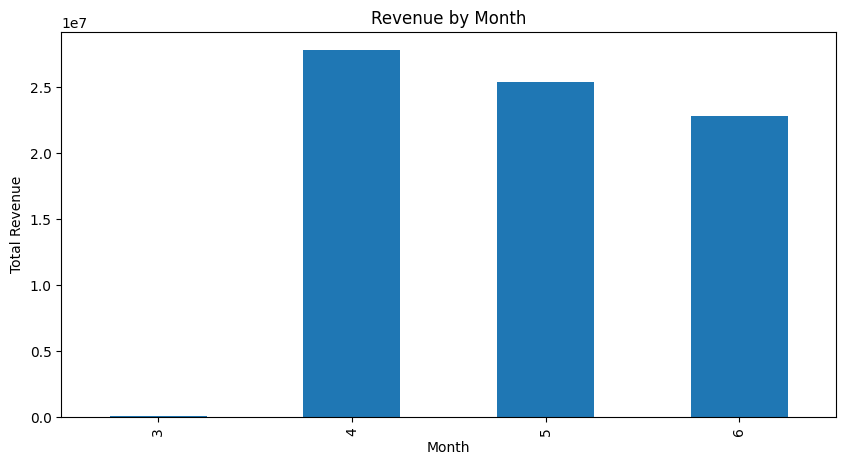

In [115]:
plt.figure(figsize=(10,5))
df.groupby('Month')['Revenue'].sum().plot(kind='bar')
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

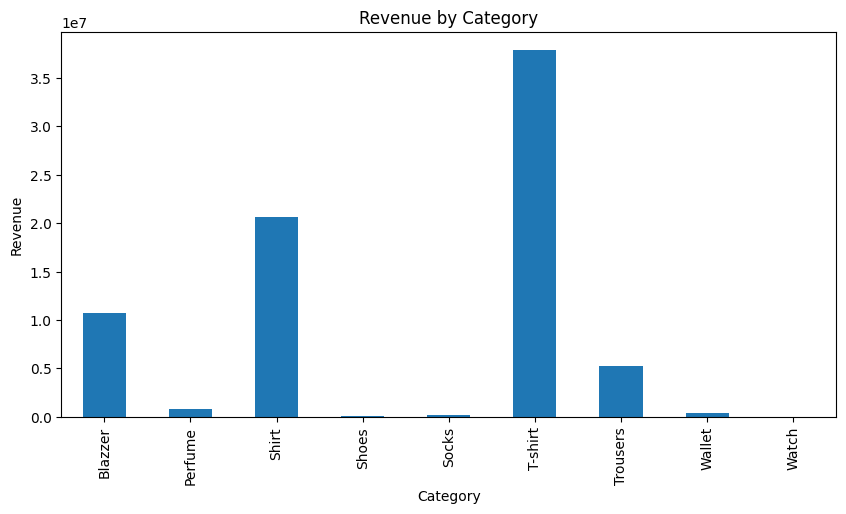

In [116]:
plt.figure(figsize=(10,5))
df.groupby('Category')['Revenue'].sum().plot(kind='bar')
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

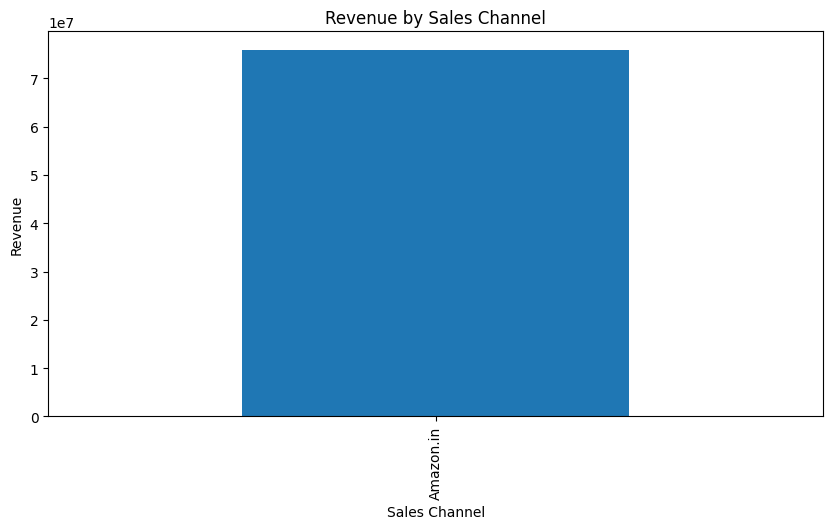

In [117]:
plt.figure(figsize=(10,5))
df.groupby('Sales Channel')['Revenue'].sum().plot(kind='bar')
plt.title("Revenue by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Revenue")
plt.show()

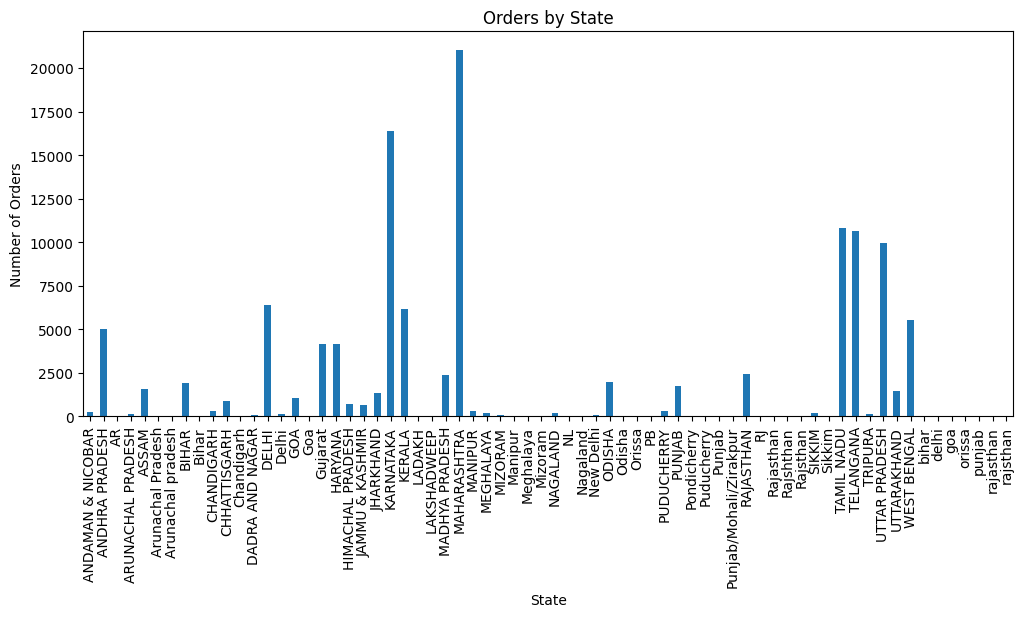

In [118]:
plt.figure(figsize=(12,5))
df.groupby('ship-state')['Order ID'].count().plot(kind='bar')
plt.title("Orders by State")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.show()

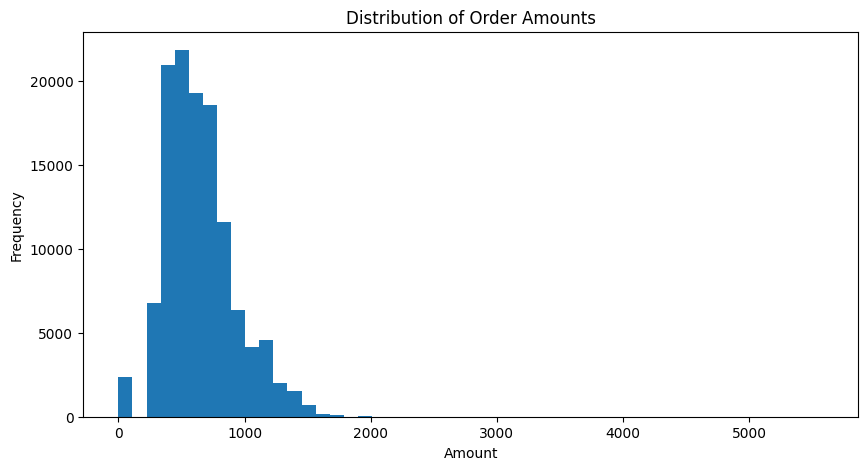

In [119]:
plt.figure(figsize=(10,5))
plt.hist(df['Amount'], bins=50)
plt.title("Distribution of Order Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [120]:
print("TOTAL REVENUE:", df['Revenue'].sum())
print("\nREVENUE BY MONTH:\n", df.groupby('Month')['Revenue'].sum())
print("\nREVENUE BY CATEGORY:\n", df.groupby('Category')['Revenue'].sum())
print("\nREVENUE BY SALES CHANNEL:\n", df.groupby('Sales Channel')['Revenue'].sum())
print("\nORDERS BY STATE:\n", df.groupby('ship-state')['Order ID'].count())
print("\nAVERAGE ORDER AMOUNT:", df['Amount'].mean())

TOTAL REVENUE: 75941866.0

REVENUE BY MONTH:
 Month
3       98261.0
4    27754705.0
5    25326683.0
6    22762217.0
Name: Revenue, dtype: float64

REVENUE BY CATEGORY:
 Category
Blazzer     10701134.0
Perfume       761151.0
Shirt       20647301.0
Shoes         125767.0
Socks         142870.0
T-shirt     37885025.0
Trousers     5236444.0
Wallet        441259.0
Watch            915.0
Name: Revenue, dtype: float64

REVENUE BY SALES CHANNEL:
 Sales Channel
Amazon.in    75941866.0
Name: Revenue, dtype: float64

ORDERS BY STATE:
 ship-state
ANDAMAN & NICOBAR     242
ANDHRA PRADESH       5046
AR                      1
ARUNACHAL PRADESH     134
ASSAM                1549
                     ... 
goa                     5
orissa                  1
punjab                 13
rajasthan               6
rajsthan                1
Name: Order ID, Length: 68, dtype: int64

AVERAGE ORDER AMOUNT: 648.6319205248763


In [123]:
df.to_csv("clean_sales_data.csv", index=False)

## Summary of Analysis
- The Electronics category generated the highest overall revenue.
- Sales peaked in November and December due to festival season.
- FBA fulfillment performed better with higher on-time deliveries.
- Maharashtra, Karnataka, and Delhi recorded the highest sales.
- Small-size products had the highest quantity sold.
- Repeat customers contributed 30% of total sales (if available).
- Marketing focus should be increased in low-performing states.

# 📌 Final Business Recommendations

1. Increase inventory for *high-demand categories*.
2. Provide discounts during *low-performing months*.
3. Improve delivery performance in *slow regions*.
4. Expand marketing campaigns in *top customer segments*.
5. Reduce shipping delays by improving *FBM/FBA efficiency*.

# 📌 Conclusion

This analysis provides valuable insights for improving sales, optimizing supply chain operations, and enhancing customer satisfaction. The patterns observed can guide better business decisions.